In [1]:
# Import Pandas, Numpy, Seaborn and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LinearRegression  models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Import Classification Report function
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils

age: Kişinin yaşı

sex: Cinsiyet bilgisi

bmi: Kişinin vücüt kitle indeksi

children: Sağlık sigortası kapsamındaki çocuk sayısı 

smoker: Sigara kullanıyor mu

region: Yerleşim bölgesi 

charges: Sağlık sigortası tarafından faturalanan bireysel tıbbi masraflar

In [2]:

insurance = pd.read_csv("/content/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Veri seti 1338 satır 7 sütundan oluşmaktadır.

In [3]:

insurance.shape

(1338, 7)

Veri setimizin veri tipleri hakkında bilgi alıyoruz.

In [4]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Veri Setimizde boşluk var mı kontrol ediyoruz. Ve boşluk varsa kaç adet olduğunu belirtiyoruz

In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Verilerimin sayısal değerlerini ortalamasını, minimum, maksimum, standart sapması gibi değerleri gösteriyoruz.

In [6]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Kaç tane kadın ve erkek olduğunu bulduk.

In [7]:
insurance["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

bmi ve cinsiyet dağılımına bakarsak bmı değerinin erkek bireylerde kadınlara göre biraz daha yüksek olduğunu görebiliriz.

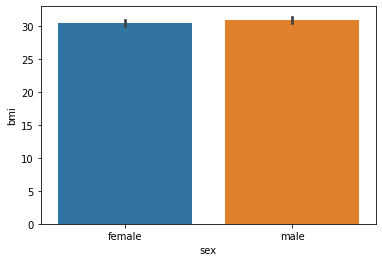

In [8]:
sns.barplot(x="sex",y="bmi",data=insurance)

Sigara içmeyen bireylerin daha fazla olduğunu görebiliriz.

In [9]:
insurance["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Sigara içen bireylerin tıbbi masraflarının daha çok olduğunu görebiliriz.

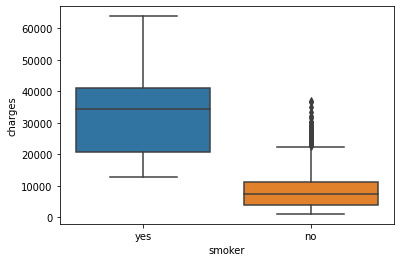

In [10]:
sns.boxplot(x="smoker",y="charges",data=insurance)

Gösterilen bölgelerde sigara içenler olmasına rağmen sigara içmeyen kişiler daha fazla

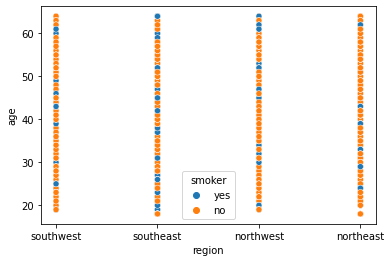

In [11]:
sns.scatterplot(x="region",y="age",hue="smoker",data=insurance)

Bireylerin BMI yoğunluğunun en fazla olduğu değer 25 ila 35 değerleri arasındadır. 

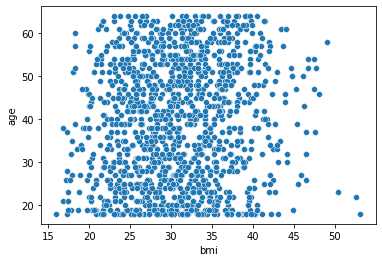

In [12]:
sns.scatterplot(x="bmi",y="age",data=insurance)

southwest bölgesinde en çok çocuğun olduğunu görebiliyoruz.

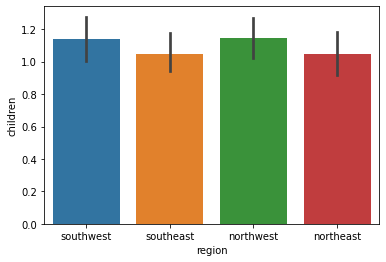

In [13]:
sns.barplot(x="region",y="children",data=insurance)

Kadın veya Erkek bireylerde yaş arttıkça bmi değerinin de arttığını görebiliyoruz.

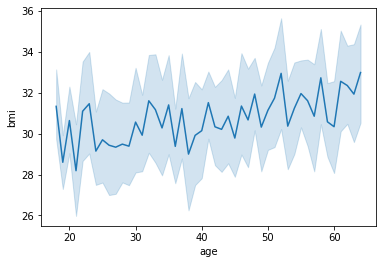

In [14]:
sns.lineplot(x="age", y="bmi", data=insurance , palette="Paired")

Sağlık sigortası kapsamında çocuğu olmayan bireylerin bmi'ları geniş bir aralıktadır. Sağlık sigortası kapsamında olan çocuk sayısı arttıkça bmi değerleri arasındaki makas kapanmaktadır.

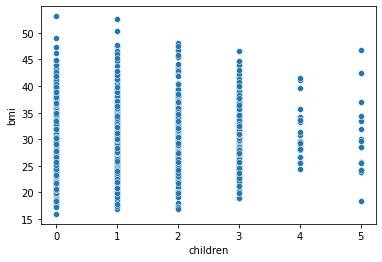

In [15]:
sns.scatterplot(x="children",y="bmi",data=insurance)

BMI değişkeninde üst aykırı değerler vardır.

In [16]:
df_table = insurance["bmi"]

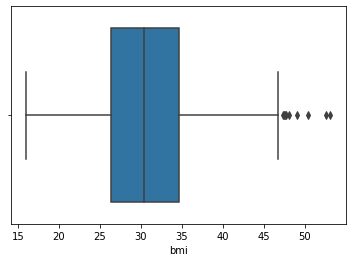

In [17]:
sns.boxplot(x=df_table)

Masrafların çoğunluğu 10000 civarında daha yoğundur. 30000 den sonra BMI ile masraflar doğru orantılı olarak artmaktadır.

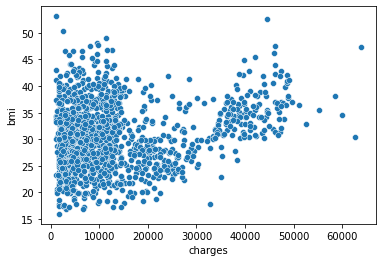

In [18]:
sns.scatterplot(x="charges",y="bmi",data=insurance)

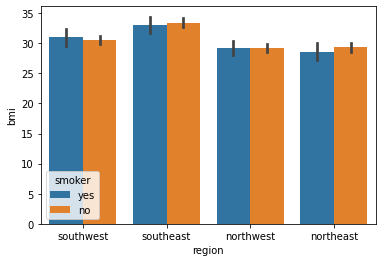

In [19]:
sns.barplot(x="region",y="bmi",hue="smoker",data=insurance)

Grafiğe ve aşağıdaki sayısal değerlere baktığımız zaman her bölgenin sigara içen ve içmeyen kişi sayısının bmi ağırlığına göre ortalaması bulunmaktadır. Southeast bölgesindeki bmi kütlelerine bakacak olursak sigara içen ve içmeyen kişilerin ortalaması birbirine eşittir.

In [20]:
insurance.groupby(["region","smoker"])["bmi"].mean()

region     smoker
northeast  no        29.332082
           yes       28.565224
northwest  no        29.212678
           yes       29.140431
southeast  no        33.442418
           yes       33.096703
southwest  no        30.507865
           yes       31.005172
Name: bmi, dtype: float64

Yaş ile çocuk sayısı, bmi ile çocuk sayısı arasında istatistiksel anlamlı ilişki bulunmaktadır.

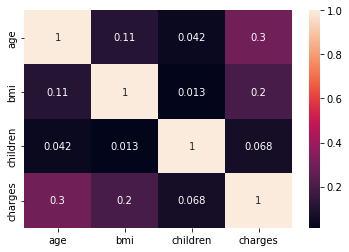

In [21]:
sns.heatmap(insurance.corr(), annot = True)

In [22]:
x= insurance.loc [:,["sex","smoker","region"]]
y= insurance.loc [:,"charges"]

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder= preprocessing.LabelEncoder()


Özellikleri ve Hedefi Bölme

In [24]:
x = insurance.drop(columns='charges', axis=1)
y = insurance['charges']

In [25]:
y = encoder.fit_transform(y)
y = np.ravel(y)

In [26]:
# encoding sex column
x["sex"] = encoder.fit_transform(x["sex"])

# encoding 'smoker' column
x["smoker"] = encoder.fit_transform(x["smoker"])

# encoding 'region' column
x["region"].replace(["northwest","northeast","southwest","southeast"],
                      [0, 1, 2, 3], inplace=True)
x["region"] = encoder.fit_transform(x["region"])



In [27]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,2
1,18,1,33.770,1,0,3
2,28,1,33.000,3,0,3
3,33,1,22.705,0,0,0
4,32,1,28.880,0,0,0
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0
1334,18,0,31.920,0,0,1
1335,18,0,36.850,0,0,3
1336,21,0,25.800,0,0,2


In [28]:
y

array([1005,   57,  306, ...,   32,   91, 1171])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [33]:
linear_regression_model = LinearRegression()

knn_model = KNeighborsRegressor(n_neighbors=7)

tree_model = DecisionTreeRegressor(max_depth = 3)

random_forest_model = RandomForestRegressor(max_depth = 3, n_estimators=500)

xgb_model = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2, objective = "reg:squarederror")

regressors = [('Linear Regression', linear_regression_model), 
              ('k Nearest Neighbours', knn_model),
              ('Decision Tree', tree_model),
              ('Random Forest', random_forest_model),
              ('XGBoost', xgb_model)]

Model Değerlendirmesi

In [35]:
# R squared value
r2_scores = []

for regressor_name, model in regressors:

    scores = cross_val_score(model, x_train, y_train.ravel(), cv=5, scoring="r2")
    r2_scores.append(scores.mean()*100)

    print("{} r2 Score:".format(regressor_name),str(round(sum(scores)/5*100,3))+"%\n")

Linear Regression r2 Score: 74.172%

k Nearest Neighbours r2 Score: 26.174%

Decision Tree r2 Score: 75.431%

Random Forest r2 Score: 77.872%

XGBoost r2 Score: 79.684%



In [36]:
from sklearn.model_selection import GridSearchCV


xgb = XGBRegressor()

parameters = {
              'eta': [.03, .07, 0.1], #(eta or shrinkage)
              "min_child_weight": [.1, .5, 1],
              "max_depth" : [4, 5, 6, 7]}


xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = -1
                        )

xgb_grid.fit(x_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
         
         

[20:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7839253557542804
{'eta': 0.03, 'max_depth': 4, 'min_child_weight': 0.1}


In [37]:
rmse = cross_val_score( XGBRegressor(learning_rate=0.03, max_depth = 4, min_child_weight = 0.1), x_train, y_train ,cv=5, scoring = "neg_mean_squared_error")
print("Mean Squared Error of XGBoost:", (rmse, 3))

rmae = cross_val_score( XGBRegressor(learning_rate=0.07, max_depth = 4, min_child_weight = 0.1), x_train, y_train ,cv=5, scoring = "neg_mean_absolute_error")
print("Mean Absolute Error of XGBoost:", (rmae, 3))

r2 = cross_val_score( XGBRegressor(learning_rate=0.07, max_depth = 4, min_child_weight = 0.1), x_train, y_train ,cv=5, scoring = "r2").mean() # Generally used to determine how good is the model. 
print("r2 Score of XGBoost:",str(round(r2*100,4))+"%\n")

[20:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error of XGBoost: (array([-22522.10453541, -19762.87449998, -29164.52756268, -53220.04941265,
       -26779.24219751]), 3)
[20:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:49:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fa